In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = "/content/FinancialMarketData.xlsx - EWS.csv"
data = pd.read_csv(file_path)

# Convert 'Data' to datetime format and rename it to 'Date'
data['Date'] = pd.to_datetime(data['Data'], errors='coerce')
data.drop(columns=['Data'], inplace=True)


In [ ]:
#Visualizations

<ipython-input-8-32bc95d5e816>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


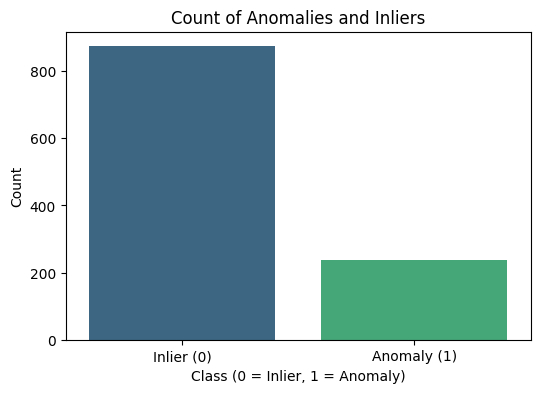

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = data['Y'].value_counts()

# Plot the counts
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Count of Anomalies and Inliers")
plt.xlabel("Class (0 = Inlier, 1 = Anomaly)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Inlier (0)', 'Anomaly (1)'])
plt.show()


In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data.drop(columns=['Y', 'Date'])  # Features
y = data['Y']  # Target variable

# Splitting the dataset with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:39:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.92
F1 Score: 0.80

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       263
           1       0.85      0.75      0.80        71

    accuracy                           0.92       334
   macro avg       0.89      0.86      0.87       334
weighted avg       0.92      0.92      0.92       334



In [28]:
#Milestone 2: Generate a random dataset and test my investment strat:
# Generate a random dataset
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=1000, freq='D')
price = np.random.normal(loc=100, scale=10, size=len(dates))
anomalies = np.random.binomial(n=1, p=0.1, size=len(dates))

random_data = pd.DataFrame({
    'Date': dates,
    'Price': price,
    'Y': anomalies
})
random_data

,Date,Price,Y
0,2020-01-01,104.967142,0
1,2020-01-02,98.617357,0
2,2020-01-03,106.476885,0
3,2020-01-04,115.230299,0
4,2020-01-05,97.658466,0
...,...,...,...
995,2022-09-22,97.188997,0
996,2022-09-23,117.976865,0
997,2022-09-24,106.408429,0
998,2022-09-25,94.288210,0


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the dataset
file_path = 'FinancialMarketData.xlsx - EWS.csv'
data = pd.read_csv(file_path)

# Convert 'Data' to datetime format and rename it to 'Date'
data['Date'] = pd.to_datetime(data['Data'], errors='coerce')
data.drop(columns=['Data'], inplace=True)

# Split the data into features and target variable
X = data.drop(columns=['Y', 'Date'])  # Features
y = data['Y']  # Target variable

# Splitting the dataset with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Implementing a data-driven investment strategy based on model predictions

# Predicting on the entire dataset to simulate investment strategy
data['Prediction'] = xgb_model.predict(X)

# Adding a column for investment decision based on prediction (1 for buy, 0 for hold/sell)
data['Investment_Decision'] = np.where(data['Prediction'] == 1, 'Buy', 'Hold/Sell')

# Displaying the first few rows of the dataset with investment decisions
print(data[['Date', 'Prediction', 'Investment_Decision']].head())

# Saving the dataset with investment decisions to a new CSV file
data.to_csv('Investment_Strategy.csv', index=False)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.92
F1 Score: 0.80

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       263
           1       0.85      0.75      0.80        71

    accuracy                           0.92       334
   macro avg       0.89      0.86      0.87       334
weighted avg       0.92      0.92      0.92       334

        Date  Prediction Investment_Decision
0 2000-01-11           0           Hold/Sell
1 2000-01-18           0           Hold/Sell
2 2000-01-25           0           Hold/Sell
3 2000-02-01           0           Hold/Sell
4 2000-02-08           1                 Buy


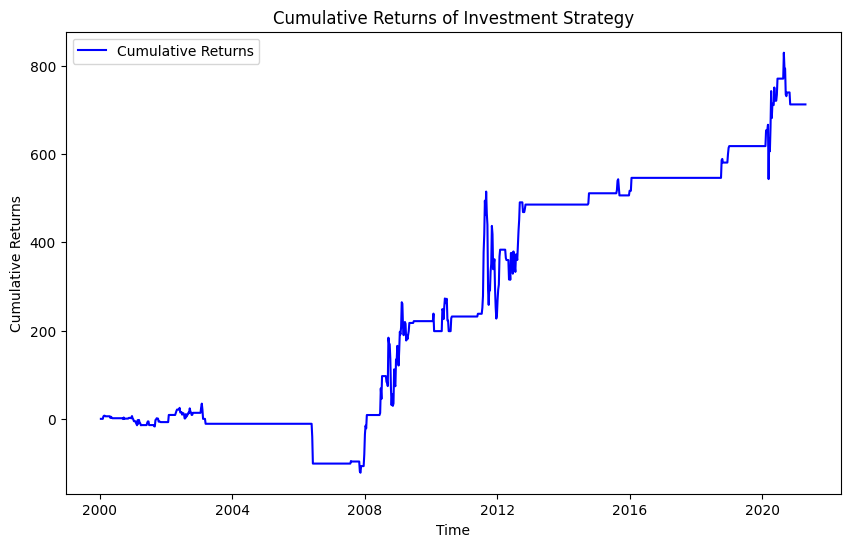

In [25]:
# Predicting on the entire dataset to simulate investment strategy
data['Prediction'] = xgb_model.predict(X)

# Adding a column for investment decision based on prediction (1 for buy, 0 for hold/sell)
data['Investment_Decision'] = np.where(data['Prediction'] == 1, 'Buy', 'Hold/Sell')

# Assuming 'Price' is the column with market data (adjust with actual column name)
data['Price'] = data['XAU BGNL'].shift(-1)  # Assuming the next day's price (or use your own price data)

# Simulate returns: If the signal is 'Buy', return the price difference
data['returns'] = np.where(data['Investment_Decision'] == 'Buy', data['Price'] - data['Price'].shift(1), 0)

# Calculate cumulative returns
data['cumulative_returns'] = data['returns'].cumsum()

# Plot cumulative returns to visualize performance of the strategy
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['cumulative_returns'], label='Cumulative Returns', color='blue')
plt.title("Cumulative Returns of Investment Strategy")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Saving the dataset with investment decisions to a new CSV file
data.to_csv('Buy_Hold_Strategy_with_Returns.csv', index=False)


In [ ]:
!git clone https://github.com/6namdang/headstarter1

# Change the current working directory to the cloned repository
import os
os.chdir('/content/')

# Save your code to a file
with open('your_script.py', 'w') as f:
    f.write('print("Hello, GitHub!")')

# Configure Git
!git config --global user.email "your-email@example.com"
!git config --global user.name "your-username"

# Add changes to the staging area
!git add .

# Commit the changes
!git commit -m "Add initial script"

# Push the changes to the remote repository
!git push origin main
